In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/gomattam.s/Documents/JupyterNotebook/StockPredictionProject/AAPL.csv')
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2022-03-24  171.059998  174.139999  170.210007  174.070007  173.021896   
1    2022-03-25  173.880005  175.279999  172.750000  174.720001  173.667984   
2    2022-03-28  172.169998  175.729996  172.000000  175.600006  174.542679   
3    2022-03-29  176.690002  179.009995  176.339996  178.960007  177.882431   
4    2022-03-30  178.550003  179.610001  176.699997  177.770004  176.699615   
..          ...         ...         ...         ...         ...         ...   
246  2023-03-17  156.080002  156.740005  154.279999  155.000000  155.000000   
247  2023-03-20  155.070007  157.820007  154.149994  157.399994  157.399994   
248  2023-03-21  157.320007  159.399994  156.539993  159.279999  159.279999   
249  2023-03-22  159.300003  162.139999  157.809998  157.830002  157.830002   
250  2023-03-23  158.830002  161.550003  157.679993  158.929993  158.929993   

        Volume  
0   

In [3]:
# Convert date strings to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

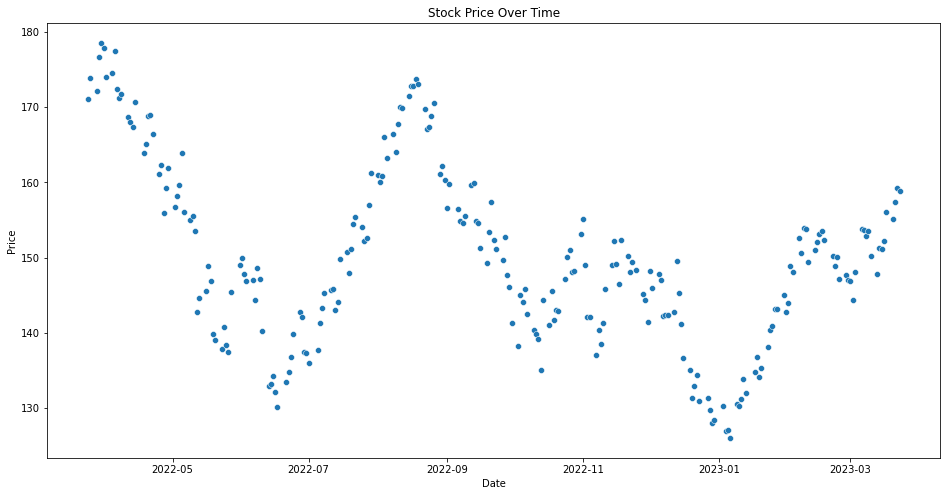

In [4]:
# Plot the data using seaborn regplot
plt.figure(figsize=(16,8))
sns.scatterplot(x='Date', y='Open', data=df)
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
# Filter dataframe to show only the last 100 days
last_100_days = df['Date'].max() - pd.Timedelta(days=100)
df_filtered = df[df['Date'] >= last_100_days].copy() 
# had to make a copy to not affect data in oringinal dataframe ^

# Add a column for the number of days since the earliest date in the dataframe
df_filtered['Days Since Start'] = (df_filtered['Date'] - df_filtered['Date'].min()).dt.days

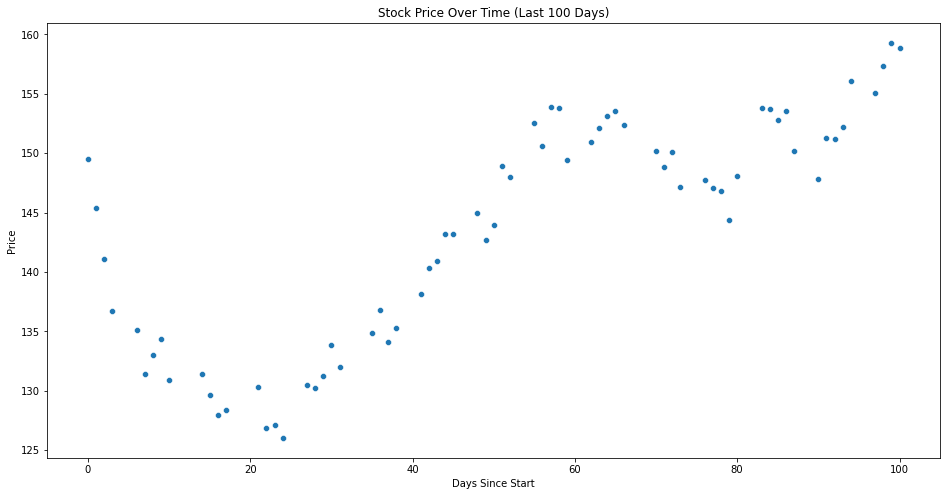

In [6]:
# Plot the data using seaborn regplot
plt.figure(figsize=(16,8))
sns.scatterplot(x='Days Since Start', y='Open', data=df_filtered)
plt.title('Stock Price Over Time (Last 100 Days)')
plt.xlabel('Days Since Start')
plt.ylabel('Price')
plt.show()

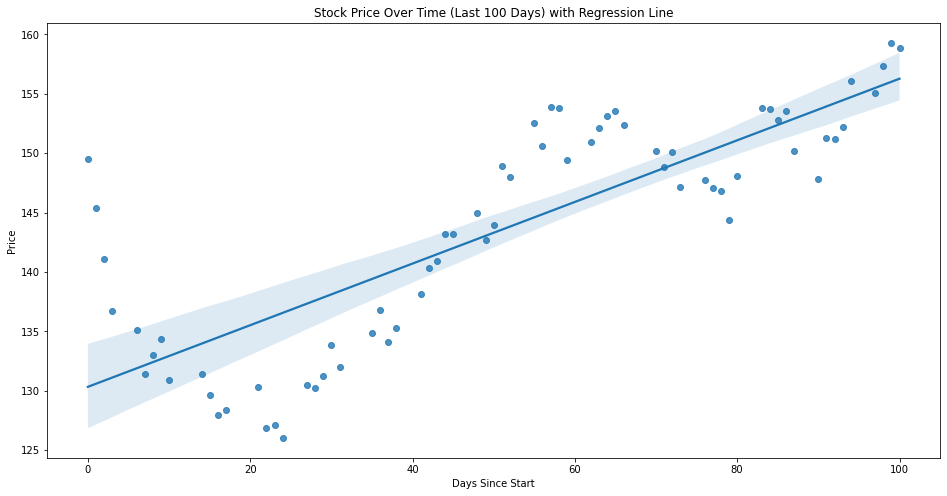

In [7]:
# Plot the data using seaborn regplot
plt.figure(figsize=(16,8))
sns.regplot(x='Days Since Start', y='Open', data=df_filtered)
plt.title('Stock Price Over Time (Last 100 Days) with Regression Line')
plt.xlabel('Days Since Start')
plt.ylabel('Price')
plt.show()

In [8]:
"""
calculates the moving average over a 20-day span

creates a rolling object that then allows us to calculate the mean 
over the rolling window
"""

ma = df['Open'].rolling(window=20).mean()

# find the moving address over the filtered data
ma_filtered = df_filtered['Open'].rolling(window=20).mean()

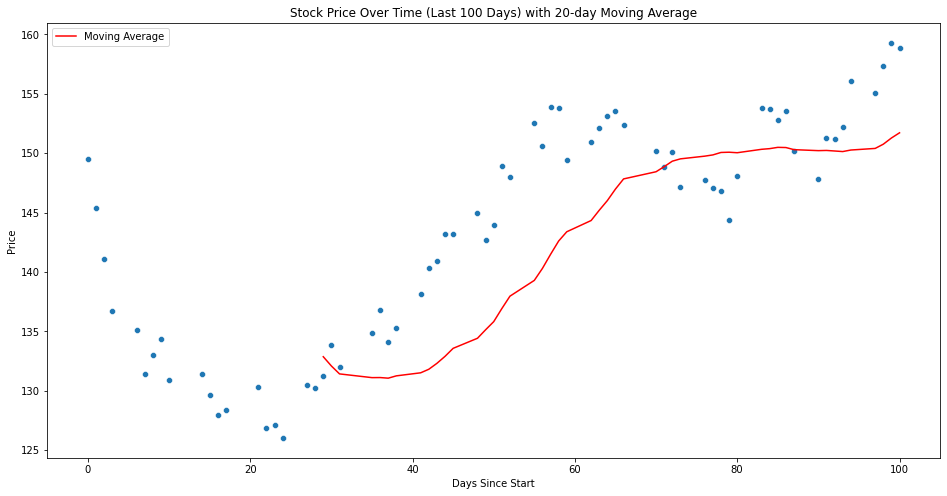

In [9]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Days Since Start', y='Open', data=df_filtered)
plt.plot(df_filtered['Days Since Start'], ma_filtered, label='Moving Average', color='red')
plt.title('Stock Price Over Time (Last 100 Days) with 20-day Moving Average')
plt.xlabel('Days Since Start')
plt.ylabel('Price')
plt.legend()
plt.show()